## Computation ACME-Pandas 4 
### 10. Pandas IV: Time Series 


* #### August 1, 2019
* #### SP Tian 

In [1]:
# Import packages and set up 

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline 

from datetime import datetime 

### Problem 1 

```strptime()``` converts a string into a new ```datetime.datetime()``` object. 

```TimeStamp``` is the pandas version. 


| Pattern | Description | 
|---------|-------------|
| %Y      | 4-digit year |
| %y      | 2-digit year |
| %m      | 1- or 2-digit month |
| %d      | 1- or 2-digit day |
| %H      | Hour (24-hour) |
| %I      | Hour (12-hour) |
| %M      | 2-digit minute |
| %S      | 2-digit second |


<!-- -->

> 表格 扩展.

用一空行包围表格。

不要缩进表格。

用 | 包裹表格的每一行。

竖直对齐所有表格边框。

将标题和内容用连字符分割，用对齐的 |。

| 周围必须要有一个空格，除非是外部的 |。

列的宽度通过列中最长的单元格确定。

In [2]:
dow = pd.read_csv("DJIA.csv")
time = pd.to_datetime(dow["DATE"])
#dow["VALUE"] = dow["VALUE"].apply(pd.to_numeric, errors = 'ignore')
#dow.plot(y = "VALUE")
dow

,DATE,VALUE
0,2006-09-27,11689.24
1,2006-09-28,11718.45
2,2006-09-29,11679.07
3,2006-10-02,11670.35
4,2006-10-03,11727.34
5,2006-10-04,11850.61
6,2006-10-05,11866.69
7,2006-10-06,11850.21
8,2006-10-09,11857.81
9,2006-10-10,11867.17


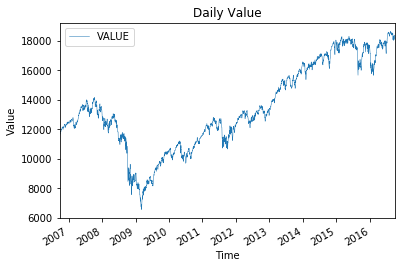

In [3]:
dow = dow.drop(columns = "DATE")
dow.index = time
dow = dow[dow["VALUE"] != "."]
dow["VALUE"] = dow["VALUE"].astype(float)

dow.plot(lw = 0.5)
plt.title("Daily Value")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

### Problem 2

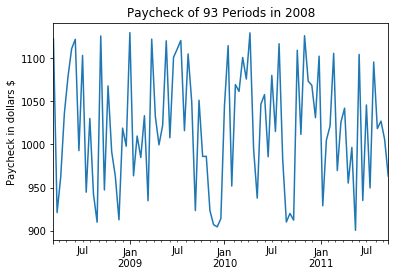

In [4]:
paycheck = pd.read_csv("paychecks.csv", squeeze=True, header=None)
paycheck.index = pd.date_range(start = '3/13/2008', periods = 93, freq = "2W-FRI")

paycheck.plot()
plt.ylabel("Paycheck in dollars $")
plt.title("Paycheck of 93 Periods in 2008")
plt.show()

### Problem 5 

In [5]:
one_dchange = dow - dow.shift(1)
print("On day of", one_dchange.idxmax()[0], " has max gain of ", 
     one_dchange.max()[0])

On day of 2008-10-13 00:00:00  has max gain of  936.4200000000001


In [6]:
print("On day of ", one_dchange.idxmin()[0], " has max loss of ", 
     one_dchange.min()[0])

On day of  2008-09-29 00:00:00  has max loss of  -777.6799999999985


In [7]:
dow_month_start = dow.resample("M").first()
dow_month_end = dow.resample("M").last()
month_change = dow_month_end - dow_month_start

print("Of the month, ", month_change.idxmax()[0], " has max gain of ", 
      month_change.max()[0])

Of the month,  2015-10-31 00:00:00  has max gain of  1391.5300000000007


In [8]:
print("Of the month, ", month_change.idxmin()[0], "has min gain of ", 
      month_change.min()[0])

Of the month,  2008-10-31 00:00:00 has min gain of  -1506.0599999999995


### Problem 6

In [9]:
def rolling_return(data, size):
    
    fig, ax = plt.subplots(figsize = (7,7))
    data.plot(color = "gray", lw = .3, ax = ax)
    data.rolling(window = size).mean().plot(label = 'rolling average', lw = 1, ax = ax)
    data.rolling(window = size).min().plot(label = 'rolling minimum', lw = 1, ax = ax)
    data.rolling(window = size).max().plot(label = 'rolling maximum', lw = 1, ax = ax)
    data.ewm(span = size).mean().plot(label = 'EWMA', lw=1, ax = ax)
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title("Dow Joe of size {}".format(size))
    plt.show()


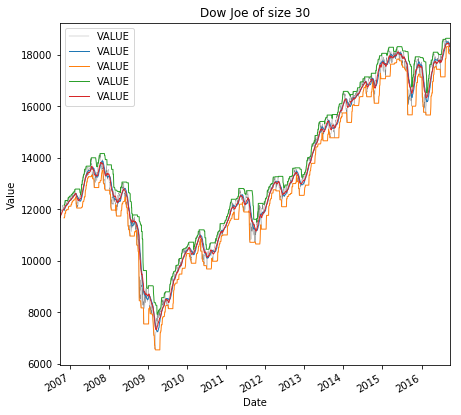

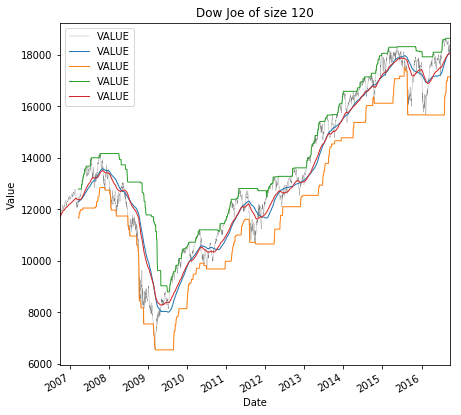

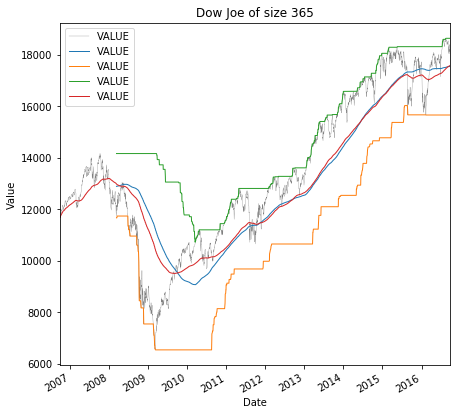

In [10]:
rolling_return(dow, 30)
rolling_return(dow, 120)
rolling_return(dow, 365)